# Topics
## Interpolation


In [3]:
%matplotlib inline

''' Initial Imports'''
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# if you'd like: use seaborn plotting style defaults -- some people like it
# > pip install seaborn

# import seaborn as sns; sns.set()

from sklearn.decomposition import PCA


## PCA has two parts:

### 1. Switch basis (components, axes, or building blocks).  Before PCA, you can think of each 8x8 image as a linear combination of 64 images each with one and only one non-zero pixel in it -- that pixel would be in a different location for each of these 64 images.  You can think of these images as the basis images (components, or buidling blocks).  In this sense, all the digit images live in a 64 dimensional space.  

### That is, each digit image is a linear combination of these 64 basis images.  Let's call this space the "single-pixel space".

### PCA switches to a different set of basis images -- the eigenimages.  There will be 64 eigenimages.  Remember you can never change the dimensionality by switching basis. If you start with a 64-dimensional space, you will end up with a 64-dimensional space.  Let's call this new space the "PCA space".

### 2. Dimenionality Reduction.  In the single-pixel space, there is no way you can adequately represent an image with just 9 components.  But in the PCA space, you can!  (You saw this last week)

In [13]:
#See if orthogonal (dot product = 0)
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
dig_data = load_digits()
dig_img = dig_data.images
X = dig_data.data
digits = dig_data.target

pca = PCA(4)
pca.fit(X)
orth = np.dot(pca.components_[0], pca.components_[1])
orth1 = np.dot(pca.components_[2], pca.components_[3])
print(orth)
print(orth1)

#Find magnitude
V = np.sqrt(sum(pca.components_[0]**2))
V1 = np.sqrt(sum(pca.components_[1]**2))
print(V)
print(V1)

6.14092110496e-16
2.28983498829e-16
1.0
1.0


<IPython.core.display.Javascript object>


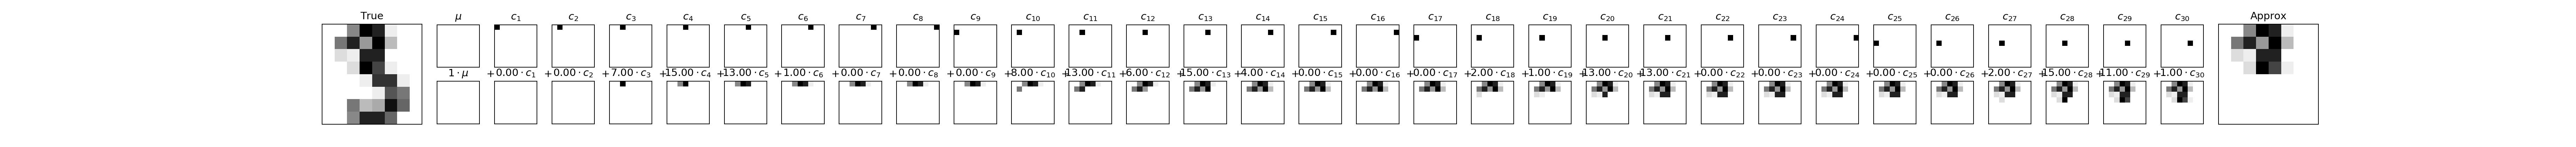

In [2]:
'''
Important to note: As you can see there is no way that you can use just 9 of such basis images 
to adequately represent a digit image (Don't worry about the mean)

But as you saw, in PCA space, 9 components are quite adequate!

In fact even 30 components in this space is not enough -- whereas in PCA space, 30 components 
are not only good enough for this particular handwritten digit "3", but are good enough for 
*all* handwritten digits.


'''

from fig_code.figures import plot_image_components
from sklearn.datasets import load_digits

dig_data = load_digits()
# sns.set_style('white')
plot_image_components(dig_data.data[3], n_components=30)

## With Fourier decomposition, all the components (basis vectors) are orthogonal.

## With PCA decomposition, all the components (basis vectors) are _also_ orthogonal.  The components are typically referred to as eigenvectors.  

## Difference between Fouirier decomposition and PCA:

## - Fourier: the basis vectors are always the same for every problem.

## - PCA: For every problem, it figures out an _optimal_ set of basis vectors (components, or eigenvectors).  Therefore a relatively small number of such eigenvectors can be used to construct a partial image that is a good enough approximation (for the purpose of recogntion, e.g.).  
## [Very much like a partial Fourier expansion]

## Mini-Breakout: Show two PCA components are orthogonal (i.e., their dot product is zero)

# An aside: How to Interpolate (Need this for HW07)
- ## One-dimensional case
- ## Two-dimensional case

## 1. One-dimensional case

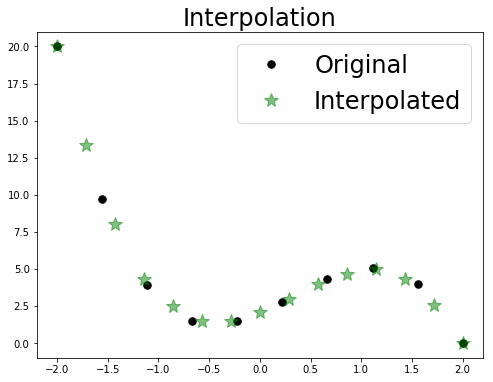

In [14]:
'''

Method 1

numpy.interp(x, xp, fp, left=None, right=None)

The idea: You have data (xp, fp) and you want to 
interpolate the data onto a new set of x values, x.
This function returns an array (the interpolated y values) 
that has the same dimension as x.


Typically this is done with linear interpolation or spline.
From docstring of interp():

One-dimensional linear interpolation.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html

'''

xlo, xhi = -2, 2

xp = np.linspace(xlo, xhi, 10)
# 3rd order polynomial
yp = 2. + 3.*xp + 2.*xp**2 - 2.*xp**3

x = np.linspace(xlo, xhi, 15)
y = np.interp(x, xp, yp)
plt.figure(figsize = (8, 6))
plt.plot(xp, yp, 'k.', ms = 15, label = 'Original')
plt.plot(x, y, 'g*', ms = 15, label = 'Interpolated', alpha = 0.5)
plt.legend(prop = {'size':24})
plt.title('Interpolation', fontsize = 24)
plt.show()


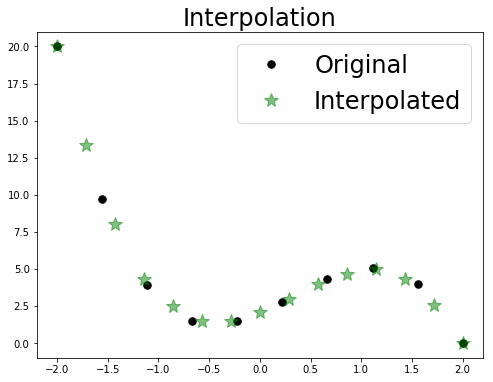

In [15]:
'''

Method 2

scipy.interpolate.interp1d(xp, fp, kind='linear', axis=-1, copy=True, \
bounds_error=True, fill_value=np.nan, assume_sorted=False)

The idea: You have data (xp, fp) and you create a function based on the 
data, which you now can apply to *any* value of x or an array of x values.  This function returns a *function*!!

Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

Note: you can oversample (more points than provided) 
or undersample (fewer points than provided, or degrade).

'''

from scipy.interpolate import interp1d

xlo, xhi = -2, 2

xp = np.linspace(xlo, xhi, 10)
# 3rd order polynomial
yp = 2. + 3.*xp + 2.*xp**2 - 2.*xp**3


# create a funcition based on (xp, yp)
f = interp1d(xp, yp)

# A new set of x values
# x = np.arange(-1.7, 1.7, 0.2)
x = np.linspace(xlo, xhi, 15)

# Apply f to x
y = f(x)

plt.figure(figsize = (8, 6))
plt.plot(xp, yp, 'k.', ms = 15, label = 'Original')
plt.plot(x, y, 'g*', ms = 15, label = 'Interpolated', alpha = 0.5)
plt.legend(prop = {'size':24})
plt.title('Interpolation', fontsize = 24)
plt.show()


## 2. Two-dimensional case

(768, 1024, 3)


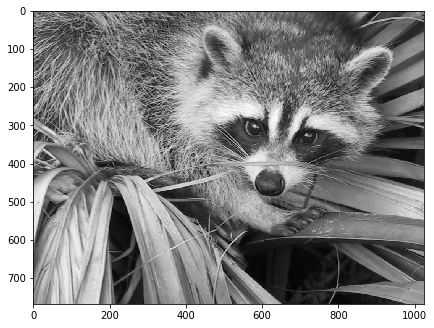

In [17]:
from scipy import signal
from scipy import misc

# an image 
face = misc.face() 

print(face.shape)
plt.figure(figsize = (7, 7))
plt.imshow(face[:, :, 1], cmap = 'gray')
plt.show()


## Breakout Exercise: Interpolation of 2D image

### Use scipy.interpolate.interp2d() to interpolate the following image to a 64x64 grid.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html

(x, y, z, kind='linear', copy=True, bounds_error=False, fill_value=nan)


## Breakout (lab -- HW07 related, so with limited help): 

### 1. Find out, and print, the dimensionality ("shape") of letterB.png (which you can download from HW07 folder).
### 2. Show the image.
### 3. Trim the image -- remove blank space around the letter, so that its shape is (150, 140).  
### 4. Print the dimensionality ("shape") of the trimmed image.
### 5. Remove the dark band at the right edge and show the image again.
### (Reason for doing 3 and 5 separately: so that removing the dark band doesn't change the size of the image.) 
### 6. Interpolate it onto a 16x16 grid.
### 7. Print the shape of the new image.
### 8. Show the original and the interpolated image side by side.

(275, 150, 4)
(275, 150)
(150, 140)


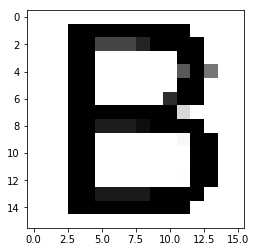

In [39]:
import matplotlib.image as mpimg
from scipy.interpolate import interp2d

imdata = mpimg.imread("letterB.png")
print(imdata.shape)
imdata = imdata[:,:,0]
print(imdata.shape)

imdata = imdata[70:220,10:150]
print(imdata.shape)

imdata[:,130:140] = 1

x = np.arange(imdata.shape[1])
y = np.arange(imdata.shape[0])
f2d = interp2d(x, y, imdata)
xnew = np.linspace(0, imdata.shape[1], 16)
ynew = np.linspace(0, imdata.shape[0], 16)

let = f2d(xnew, ynew)

plt.imshow(let, cmap="gray")

# plt.imshow(imdata, cmap="gray")
plt.show()

## End of Week 14-1